In [118]:
#imports
import numpy as np
import pandas as pd
import lasio 
from las_py import Laspy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap

In [119]:
las = lasio.read("./data/100163203803W400.las")
mnemonic = las.keys()
print(mnemonic)

['DEPTH', 'GR', 'NPHI', 'PE', 'RHOB', 'AC']


In [120]:
data = np.loadtxt('./data/100163203803W400.las', skiprows=52)

data = pd.DataFrame(data, columns=mnemonic)

#data_scaled = normalize(data)
#data_scaled = pd.DataFrame(data_scaled, columns=mnemonic)

data.head(10)

,DEPTH,GR,NPHI,PE,RHOB,AC
0,770.80,68.87,0.430,0.99,1.916,384.91
1,770.84,68.38,0.399,1.00,2.041,376.11
2,770.88,65.32,0.358,1.16,2.192,366.95
3,770.92,65.47,0.333,1.50,2.323,358.01
4,770.96,66.36,0.313,1.92,2.367,349.87
5,771.00,65.03,0.298,2.13,2.359,342.99
6,771.04,66.45,0.293,2.20,2.338,337.69
7,771.08,68.83,0.298,2.33,2.314,334.15
8,771.12,67.63,0.295,2.38,2.310,332.33
9,771.16,67.57,0.296,2.29,2.321,331.98


In [121]:
facies = np.loadtxt('./data/100163203803W400_Lithology_Facies.las', skiprows=48)
#facies = pd.DataFrame(facies, columns=['DEPTH', 'Lithology'])
for face in facies:
    if (face[1] == -999.25):
        face[1] = 0

In [122]:
data['Lithology'] = facies[:, 1]
data.head(10)

,DEPTH,GR,NPHI,PE,RHOB,AC,Lithology
0,770.80,68.87,0.430,0.99,1.916,384.91,7.0
1,770.84,68.38,0.399,1.00,2.041,376.11,4.0
2,770.88,65.32,0.358,1.16,2.192,366.95,4.0
3,770.92,65.47,0.333,1.50,2.323,358.01,4.0
4,770.96,66.36,0.313,1.92,2.367,349.87,4.0
5,771.00,65.03,0.298,2.13,2.359,342.99,4.0
6,771.04,66.45,0.293,2.20,2.338,337.69,4.0
7,771.08,68.83,0.298,2.33,2.314,334.15,4.0
8,771.12,67.63,0.295,2.38,2.310,332.33,4.0
9,771.16,67.57,0.296,2.29,2.321,331.98,4.0


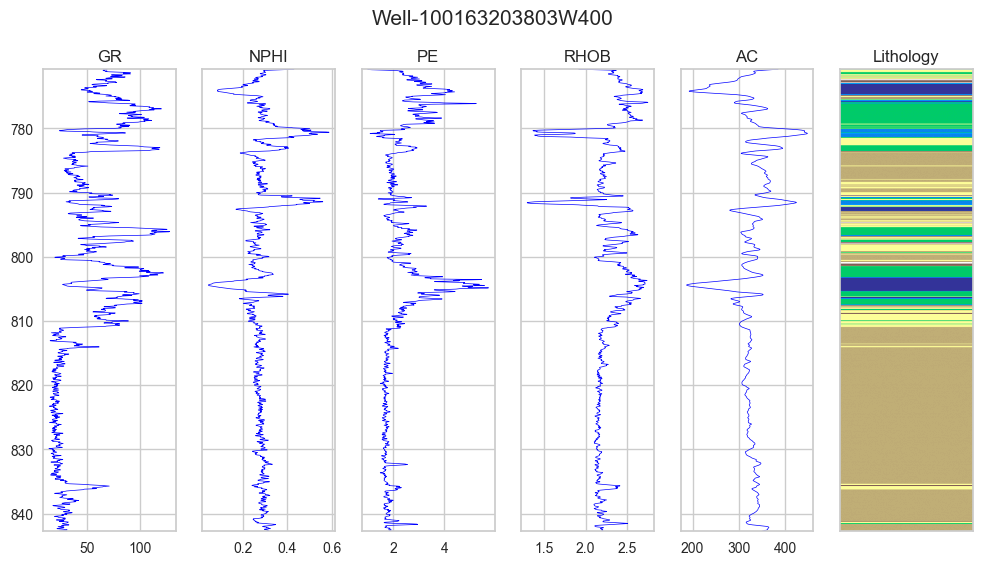

In [123]:
logs = data.columns[1:]
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)


#colors = lithology_colors.values()
#cmap = ListedColormap(colors)
plt.suptitle('Well-100163203803W400', size=15)
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[logs[i]], data.DEPTH, color='blue', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    if i == cols-1:
        F = np.vstack((data['Lithology'], data['Lithology'])).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)], cmap = 'terrain_r')
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')

In [124]:
x = data.iloc[:,1:6]
x.drop('NPHI', inplace=True, axis=1)
x.head(10)

/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_1556/599775141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('NPHI', inplace=True, axis=1)


,GR,PE,RHOB,AC
0,68.87,0.99,1.916,384.91
1,68.38,1.00,2.041,376.11
2,65.32,1.16,2.192,366.95
3,65.47,1.50,2.323,358.01
4,66.36,1.92,2.367,349.87
5,65.03,2.13,2.359,342.99
6,66.45,2.20,2.338,337.69
7,68.83,2.33,2.314,334.15
8,67.63,2.38,2.310,332.33
9,67.57,2.29,2.321,331.98


In [130]:
# Create pipeline with standard scaler and KNN
pipe = make_pipeline(StandardScaler(), KNN(n_neighbors=5))

# Define stratified sampling CV 
cv = StratifiedKFold(10, shuffle=True)

# Cross-validation
cv_scores = cross_val_score(pipe, x, data['Lithology'], cv=cv, scoring='accuracy')
mean_cv_scores = np.mean(cv_scores)
print('Accuracy mean from 10-fold CV:', mean_cv_scores)

Accuracy mean from 10-fold CV: 0.9472222222222222


In [108]:
# Fit model to training data
pipe.fit(x, data['Lithology'])

# Predict facies on training data
y_pred = pipe.predict(x)

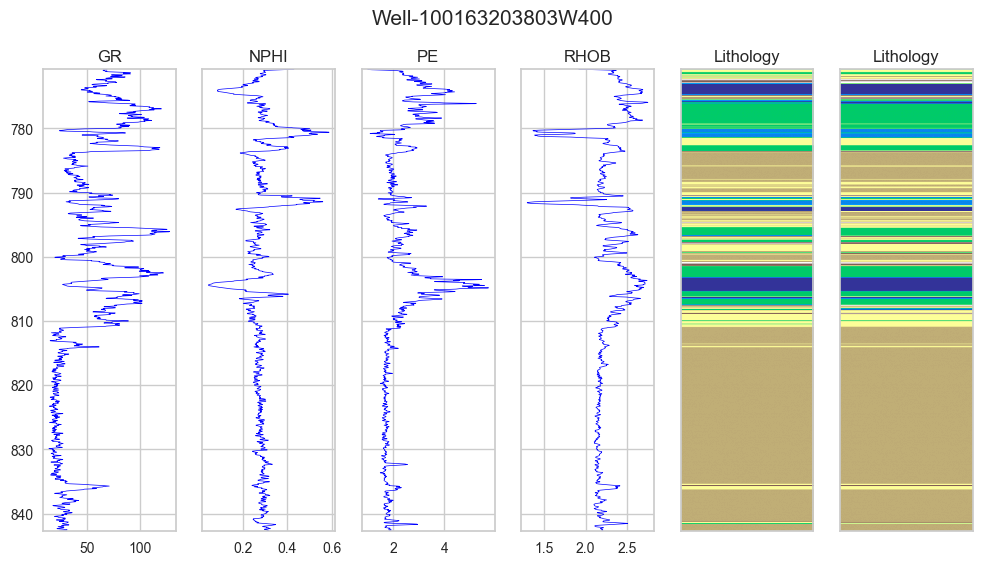

In [109]:
logs = data.columns[1:]
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)


#colors = lithology_colors.values()
#cmap = ListedColormap(colors)
plt.suptitle('Well-100163203803W400', size=15)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[logs[i]], data.DEPTH, color='blue', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    if i == cols-2:
        F = np.vstack((data['Lithology'], data['Lithology'])).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)], cmap = 'terrain_r')
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')
    if i == cols-1:
        F = np.vstack((y_pred, y_pred)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)], cmap = 'terrain_r')
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')
        

In [110]:
las = lasio.read("./data/102060503903W400_log.las")
mnemonic = las.keys()
print(mnemonic)

['DEPT', 'AC', 'GR', 'NPHI', 'DEN', 'PEF']


In [111]:
data = np.loadtxt('./data/102060503903W400_log.las', skiprows=32)

data = pd.DataFrame(data, columns=mnemonic)
data.rename(columns = {'DEN':'RHOB'}, inplace = True)
data.rename(columns = {'PEF':'PE'}, inplace = True)

#data_scaled = normalize(data)
#data_scaled = pd.DataFrame(data_scaled, columns=mnemonic)

data.head(10)
print(len(data))

4166


In [112]:
x_test = data.iloc[:,1:6]
x_test.drop('NPHI', inplace=True, axis=1)
swap_list = ['GR', 'PE', 'RHOB', 'AC']
x_test = x_test.reindex(columns=swap_list)
x_test.head(10)

/var/folders/4q/2_vnm84j6hl9mgc_6srxd8_40000gn/T/ipykernel_1556/3931737515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop('NPHI', inplace=True, axis=1)


,GR,PE,RHOB,AC
0,89.303101,2.5019,2.378613,299.688690
1,87.962898,2.5188,2.376500,295.939911
2,86.622597,2.4686,2.370461,292.191101
3,85.282303,2.4184,2.364421,288.442291
4,83.942001,2.3767,2.372171,284.693481
5,82.601799,2.3349,2.379920,280.944702
6,80.268402,2.3716,2.410160,276.484985
7,77.935097,2.4083,2.440400,272.025513
8,75.601700,2.5626,2.488537,267.565796
9,73.268402,2.7170,2.536673,263.106201


In [113]:
# Predict on test set
y_pred_test = pipe.predict(x_test)

In [114]:
facies = np.loadtxt('./data/102060503903W400_Lithology_Facies.las', skiprows=48)
#facies = pd.DataFrame(facies, columns=['DEPTH', 'Lithology'])
for face in facies:w
    if (face[1] == -999.25):
        face[1] = 0
print(len(facies))

data['Lithology'] = facies[:, 1]
data.head(10)

4233


ValueError: Length of values (4233) does not match length of index (4166)

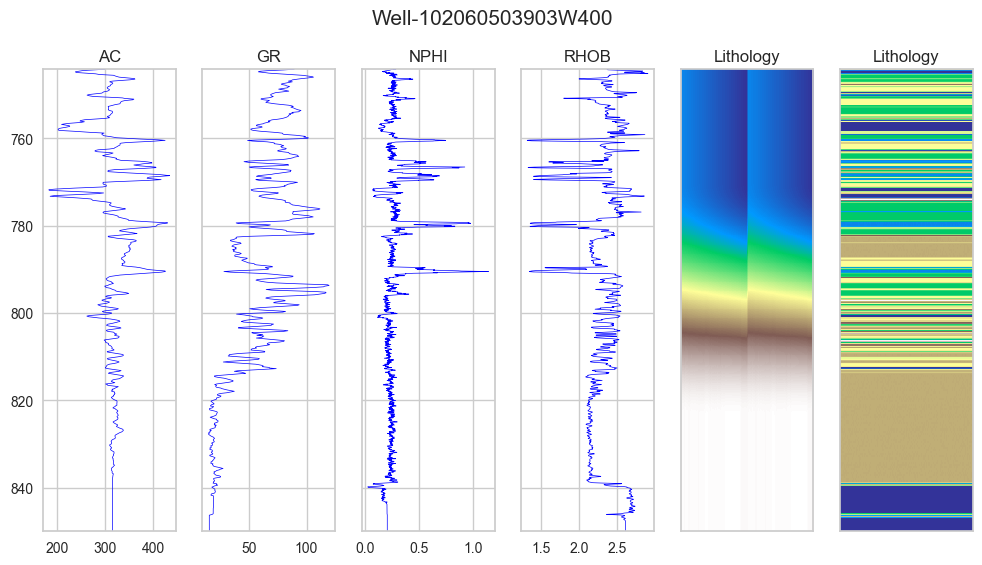

In [115]:
logs = data.columns[1:]
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)


#colors = lithology_colors.values()
#cmap = ListedColormap(colors)
plt.suptitle('Well-102060503903W400', size=15)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[logs[i]], data.DEPT, color='blue', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data.DEPT), min(data.DEPT))
    if i == cols-2:
        F = np.vstack((facies, facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPT), min(data.DEPT)], cmap = 'terrain_r')
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')
    if i == cols-1:
        F = np.vstack((y_pred_test, y_pred_test)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPT), min(data.DEPT)], cmap = 'terrain_r')
        ax[i].axes.get_xaxis().set_visible(False)
        ax[i].axes.get_yaxis().set_visible(False)
        ax[i].set_title('Lithology')